In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import tensorflow as tf
from matplotlib import pyplot as plt

2022-10-19 07:37:06.137022: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [3]:
sns.set_theme()

## Utils

<AxesSubplot:xlabel='epoch', ylabel='loss'>

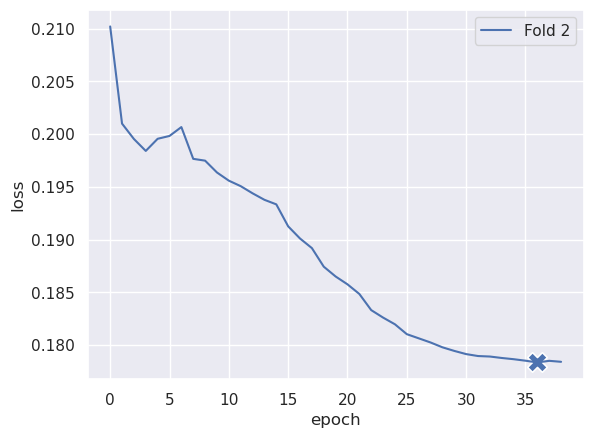

In [86]:
sns.lineplot(x=df.epoch, y=df.loss, label=f"Fold {fold+1}")
best = df.loss.argmin()
df.epoch[best], df.loss[best]
sns.scatterplot(x=[df.epoch[best]], y=[df.loss[best]], marker="X", s=200)

In [53]:
 # epoch       auc      loss   val_auc  val_loss

In [103]:
def plot_loss(path):
    for fold, history_fold in enumerate(tf.io.gfile.glob(f"{path}/*.csv")):
        df = pd.read_csv(history_fold)
        sns.lineplot(data=df, x="epoch", y="loss", label=f"Fold {fold+1}")
        
def plot_val_loss(path):
    for fold, history_fold in enumerate(tf.io.gfile.glob(f"{path}/*.csv")):
        df = pd.read_csv(history_fold)
        sns.lineplot(data=df, x="epoch", y="val_loss", label=f"Fold {fold+1}")
        
        best = df.val_loss.argmin()
        sns.scatterplot(x=[df.epoch[best]], y=[df.val_loss[best]], marker="X", s=200)
        
def plot_auc(path):
    for fold, history_fold in enumerate(tf.io.gfile.glob(f"{path}/*.csv")):
        df = pd.read_csv(history_fold)
        sns.lineplot(data=df, x="epoch", y=df.iloc[:, 1], label=f"Fold {fold+1}")
        
def plot_val_auc(path):
    for fold, history_fold in enumerate(tf.io.gfile.glob(f"{path}/*.csv")):
        df = pd.read_csv(history_fold)
        sns.lineplot(data=df, x="epoch", y=df.iloc[:, 3], label=f"Fold {fold+1}")
        
        best = df.val_loss.argmin()
        sns.scatterplot(x=[df.epoch[best]], y=[df.iloc[:, 3][best]], marker="X", s=200)

In [104]:
def plot_model_learning(name, path):
    fig = plt.figure(figsize=(16, 12))
    fig.suptitle(name)
    
    plt.subplot(221)
    plot_loss(path)
    plt.title("Loss")
    plt.legend();

    plt.subplot(222)
    plot_val_loss(path)
    plt.title("Loss Validate")
    plt.legend();

    plt.subplot(223)
    plot_auc(path)
    plt.title("AUC")
    plt.legend();

    plt.subplot(224)
    plot_val_auc(path)
    plt.title("AUC Validate")
    plt.legend();

## Run

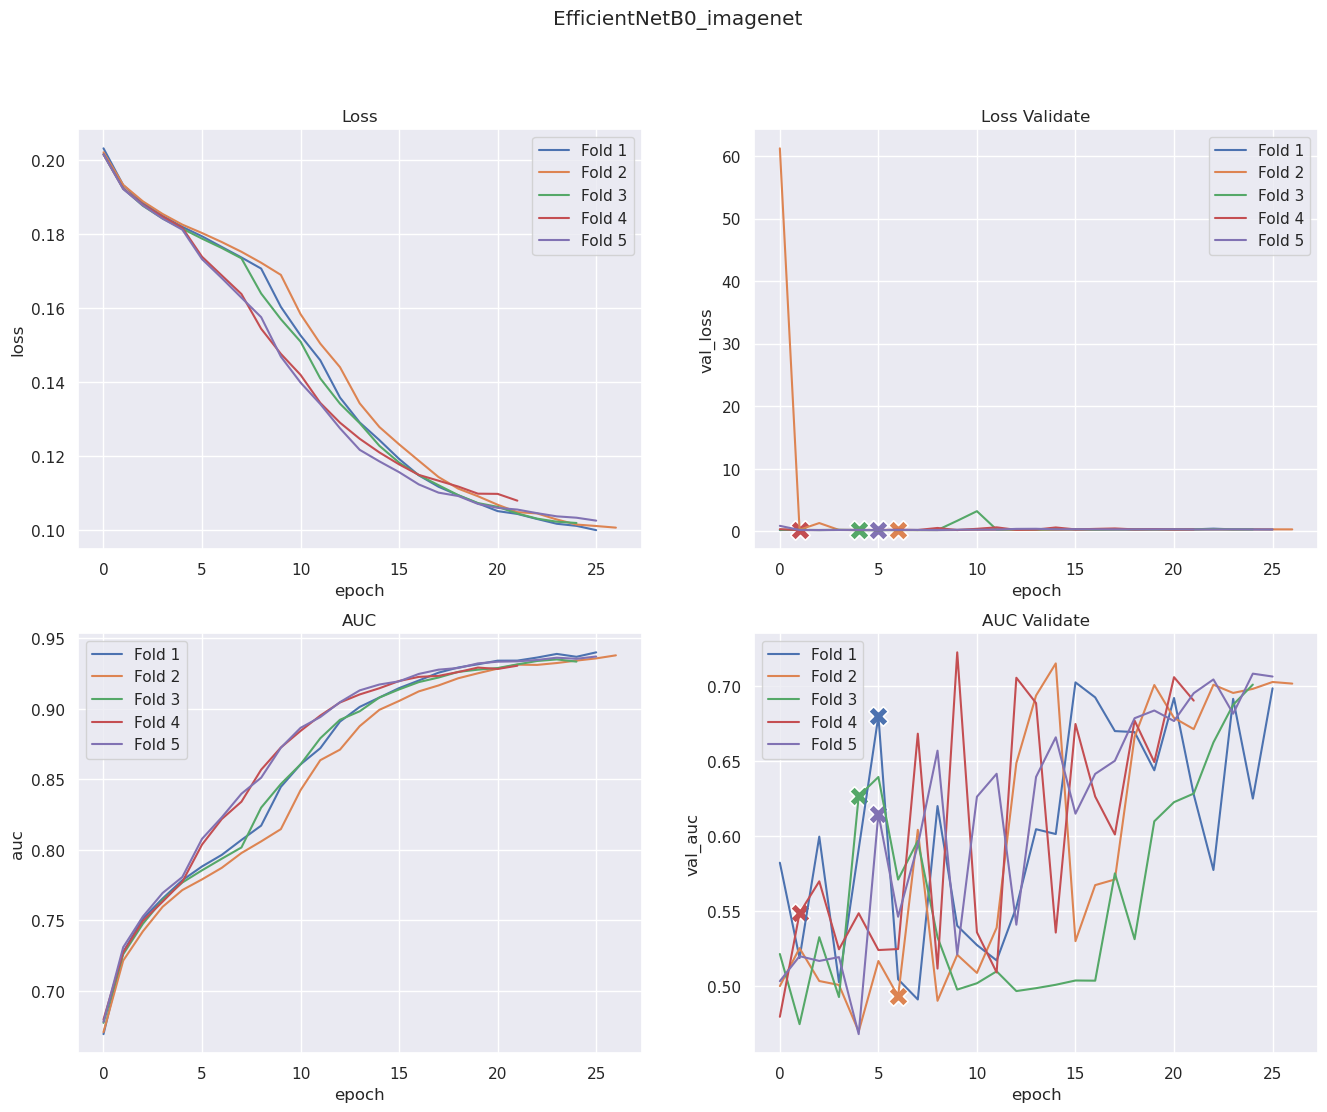

In [105]:
name = "EfficientNetB0_imagenet"
path = "results/history/EfficientNetB0_imagenet"
plot_model_learning(name, path)

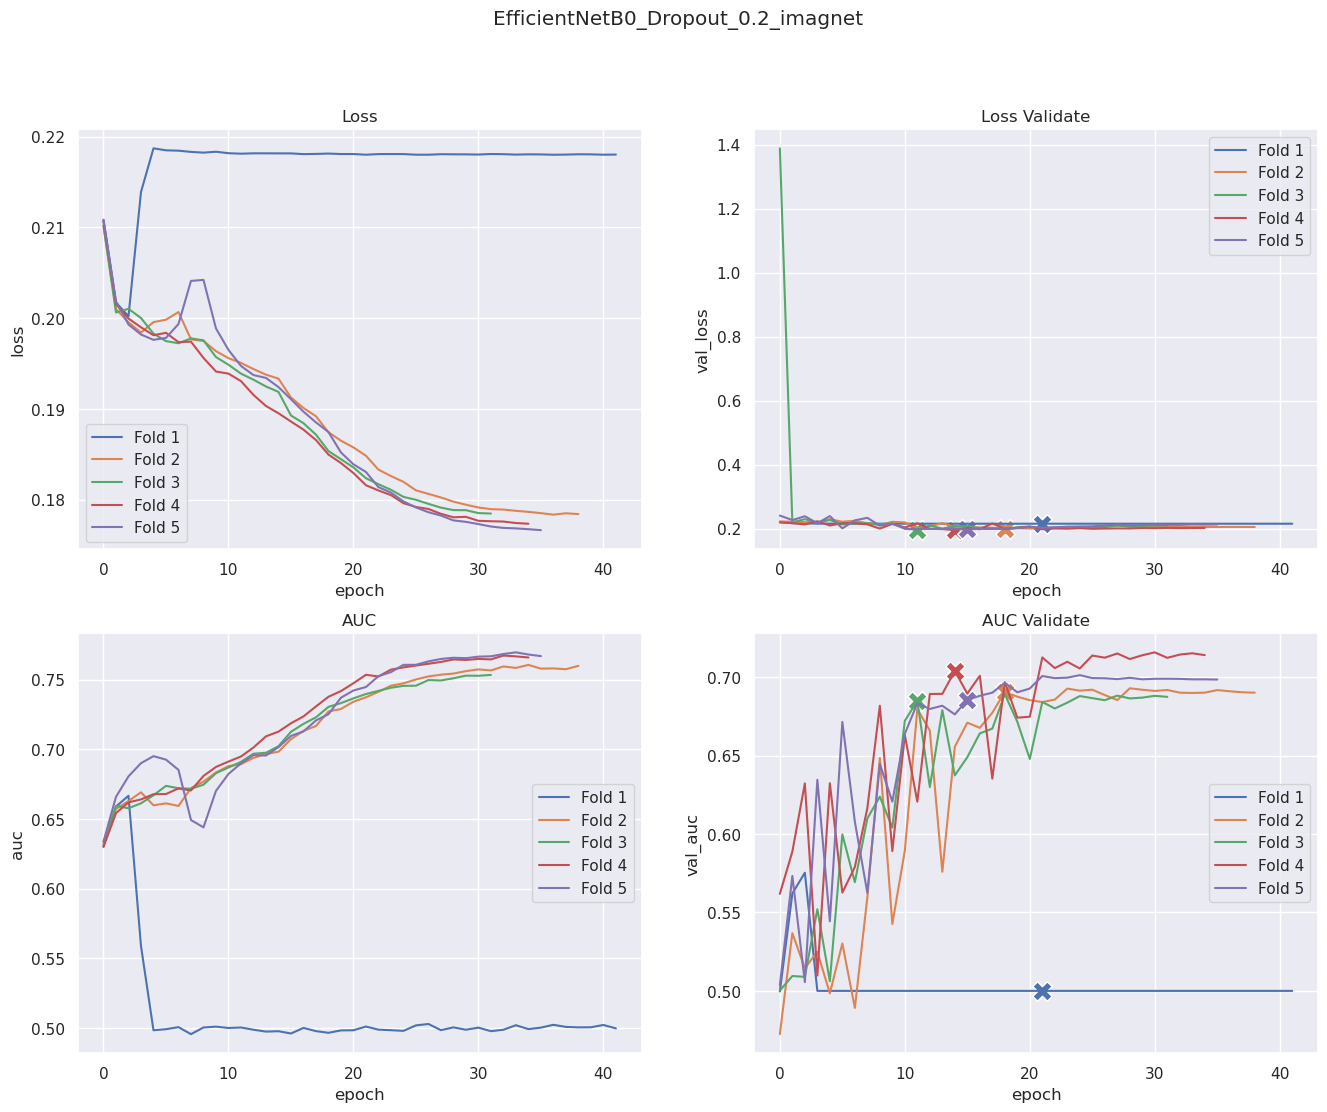

In [106]:
name = "EfficientNetB0_Dropout_0.2_imagnet"
path = "results/history/EfficientNetB0_Dropout_02_imagenet"
plot_model_learning(name, path)

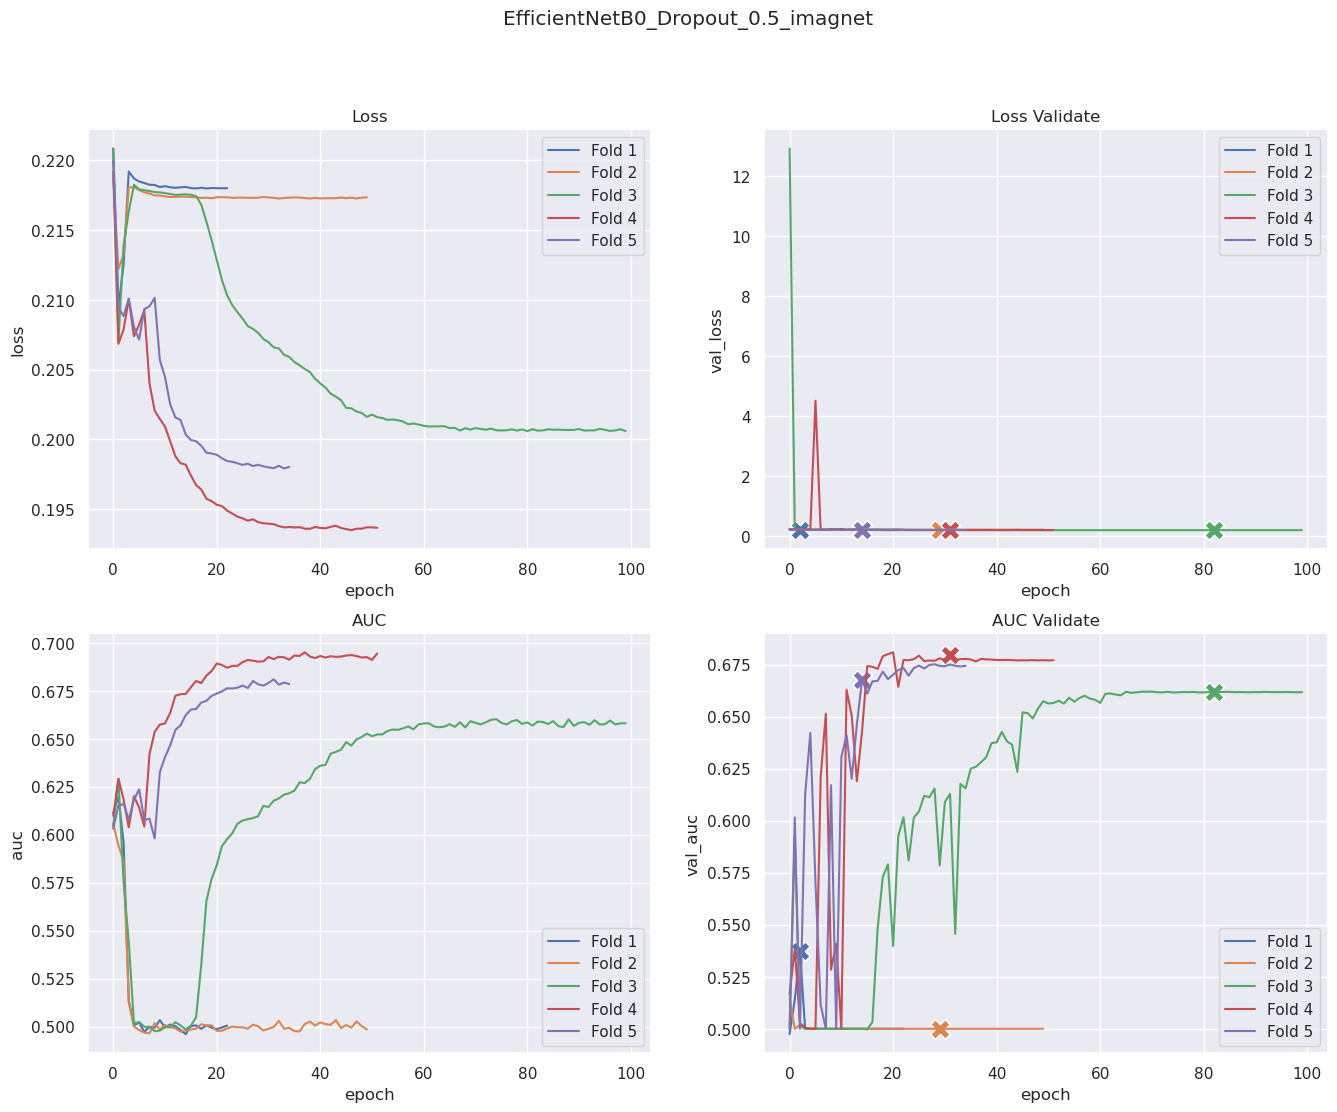

In [107]:
name = "EfficientNetB0_Dropout_0.5_imagnet"
path = "results/history/EfficientNetB0_Dropout_imagenet"
plot_model_learning(name, path)